# K-Nearest Neighbor :
Se tomará un archivo con opiniones de usuarios sobre una App. Para efectos del ejercicio, sólo se tomarán dos características: WORDCOUNT con la cantidad de palabras utilizadas y SENTIMENTVALUE con un valor entre -4 y 4 que indica si el comentarios fue valorado como positivo o negativo. Las etiquetas serán las estrellas que dieron los usuarios a la App, que son valores discretos entre 1 al 5.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#dataframe = pd.read_csv(r"reviews_sentiment.csv",sep=';')
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
dataframe = pd.read_csv(name, sep=';', encoding_errors= 'replace')
dataframe.head(10)

Saving reviews_sentiment.csv to reviews_sentiment.csv


,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexin,Hola desde hace algo m�s de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de ,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba m�s acostumbrado al otro dise�o, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de esc�ndalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el dise�o es ...,13,negative,negative,1,-0.797961


In [ ]:
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,188.000000,188.000000,188.000000
mean,13.021277,3.207447,0.141641
std,12.891135,1.276923,0.459234
min,1.000000,1.000000,-0.950121
25%,4.000000,2.750000,-0.114771
50%,9.000000,3.000000,0.152520
75%,18.000000,4.000000,0.482036
max,76.000000,5.000000,0.987533


# Algunas visualizaciones

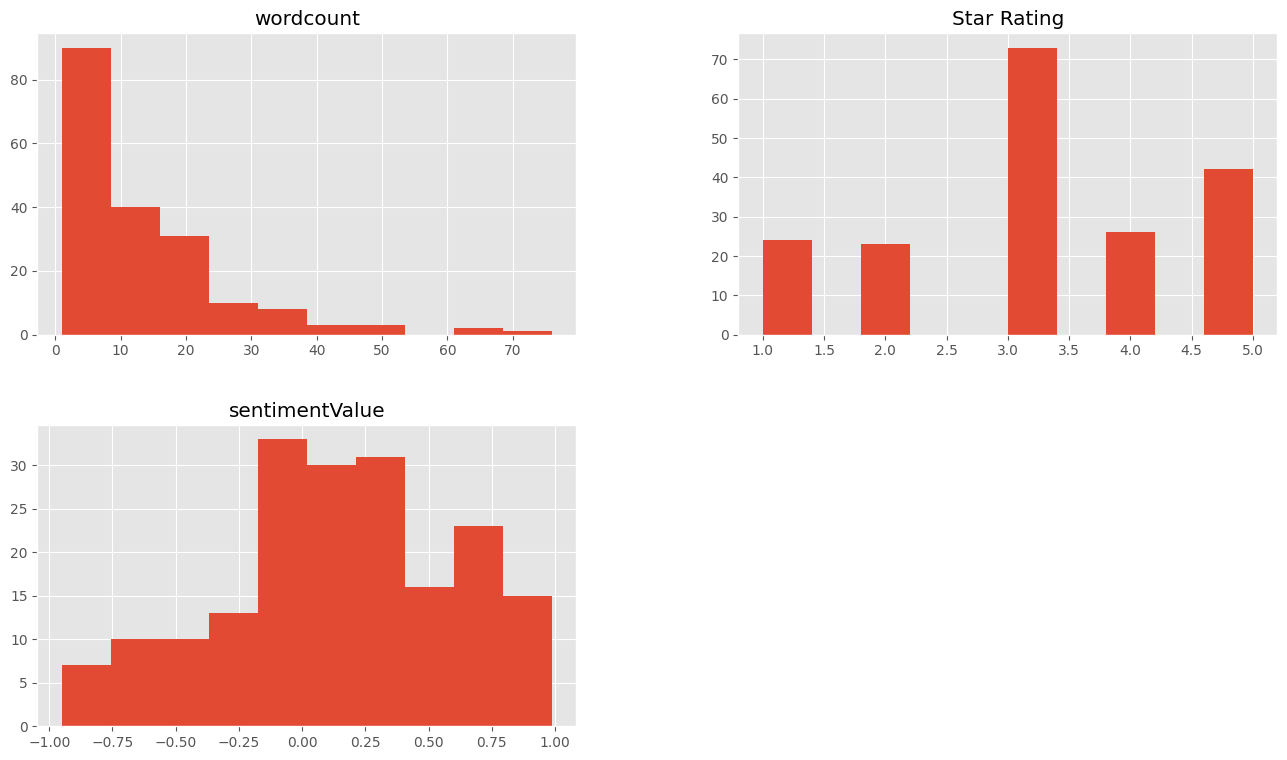

In [ ]:
dataframe.hist()
plt.show()

In [ ]:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    24
2    23
3    73
4    26
5    42
dtype: int64


In [ ]:
sb.factorplot('Star Rating',data=dataframe,kind="count", aspect=3)

AttributeError: ignored

In [ ]:
sb.factorplot('wordcount',data=dataframe,kind="count", aspect=3)

AttributeError: ignored

# Preparamos el Dataset

In [ ]:
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creamos el Modelo

In [ ]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.83


# Resultados obtenidos

In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 6  0  0  0  0]
 [ 0  4  1  0  0]
 [ 1  0 15  0  2]
 [ 0  0  2  4  2]
 [ 0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.80      0.89         5
           3       0.83      0.83      0.83        18
           4       1.00      0.50      0.67         8
           5       0.71      1.00      0.83        10

    accuracy                           0.83        47
   macro avg       0.88      0.83      0.83        47
weighted avg       0.86      0.83      0.82        47



# Gráfica de la Clasificación Obtenida

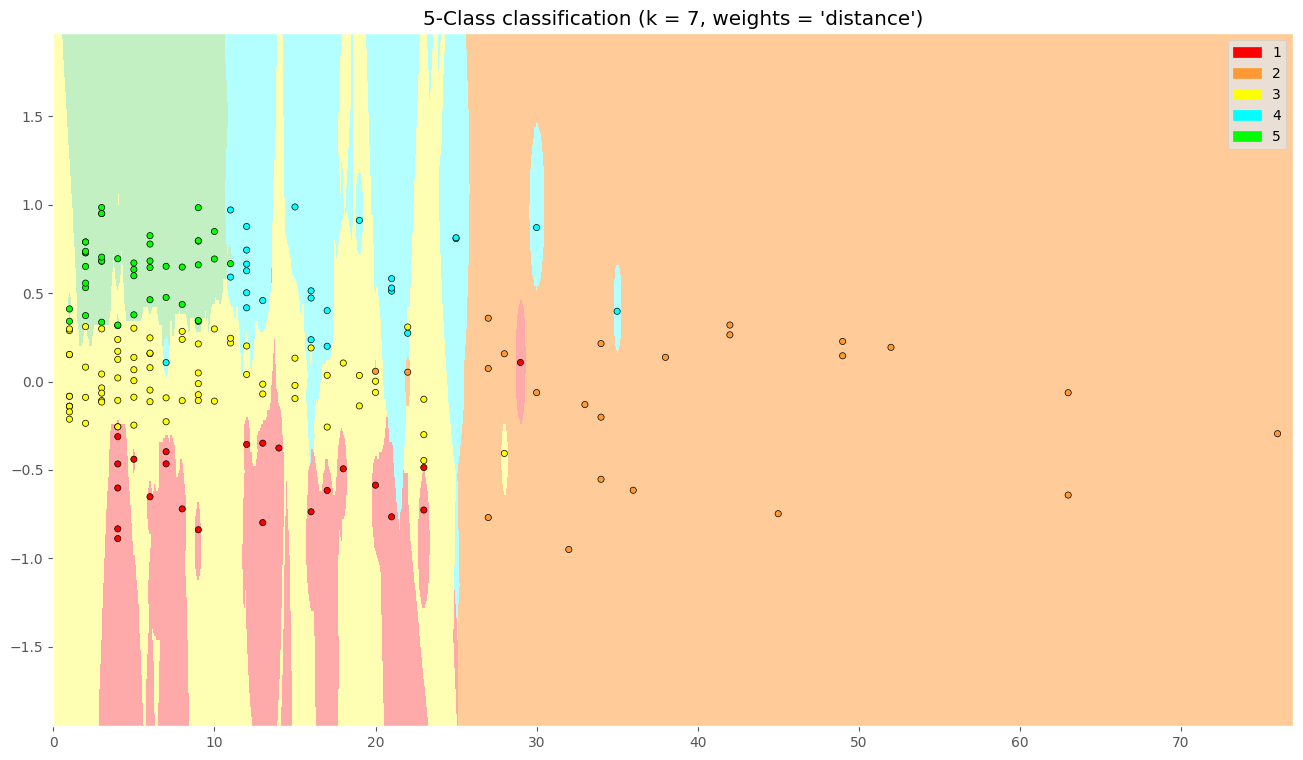

In [ ]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])


plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

# Como obtener el valor de K

([<matplotlib.axis.XTick at 0x7f55e9c54700>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

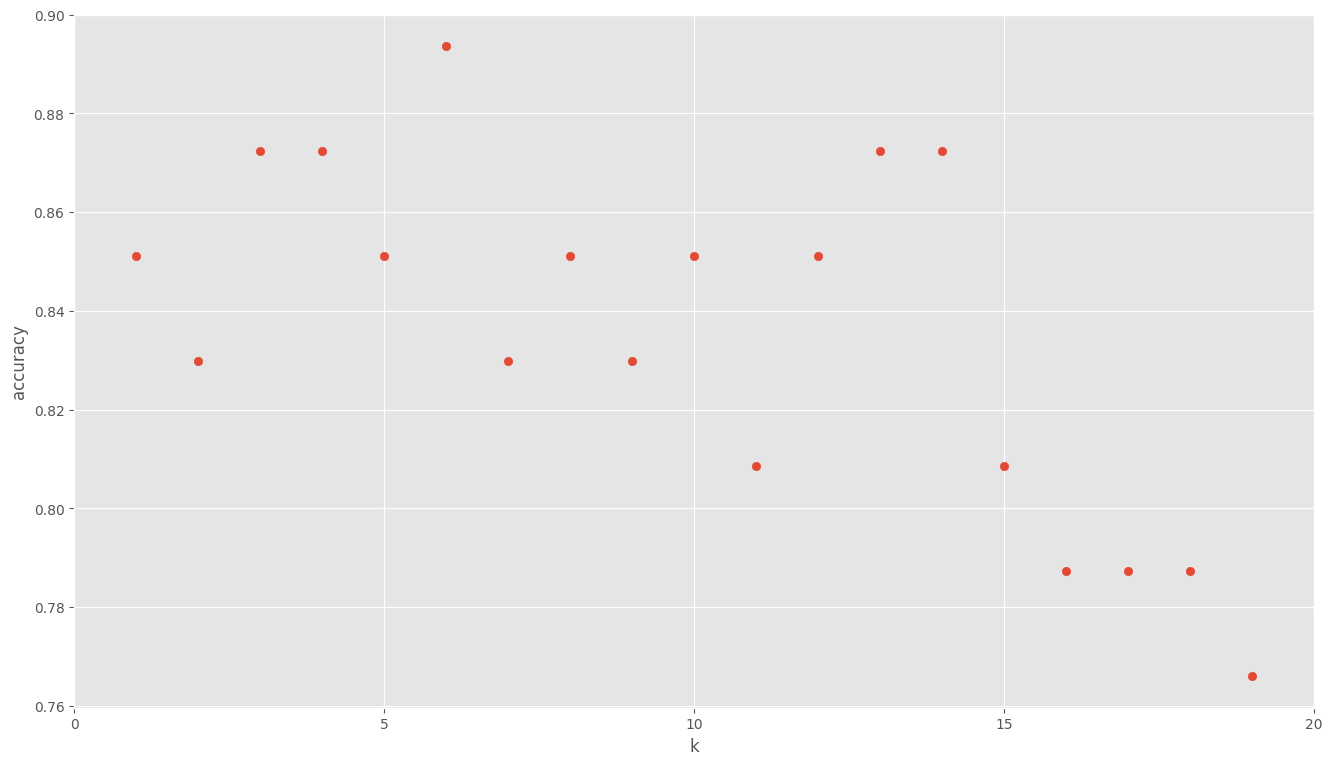

In [ ]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

# Predicciones

In [ ]:
print(clf.predict([[5, 1.0]]))

[5]


In [ ]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00249059 0.02520287 0.97100673 0.00129981 0.        ]]
